In [553]:
import dataLoader as loader
import HDDMmodelMaker as ddm
import pandas as pd
import time
import matplotlib.pyplot as plt
import hddm
import random

In [103]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data = dataLoader.parse_files(files)
data = dataLoader.formatData(data, subjects=False)

fixed_s = data[data.treatment == "fix"]
changing_s = data[data.treatment == "changing"]
weak_s = data[data.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()

In [104]:
model = hddm.HDDM(fixed_s, include='z')
model.sample(2000, burn=100)
stat=model.gen_stats() 

 [-----------------100%-----------------] 2000 of 2000 complete in 43.9 sec

In [105]:
model = modeler.fit_model(fixed_s, 2000, 20)
stat=model.gen_stats() 

 [-----------------100%-----------------] 2000 of 2000 complete in 43.8 sec

In [106]:
def plot_rounds(data_f, data_c, data_w, param, title):
    param_f = data_f.loc[(data_f.parameter == param), ["mean", "round"]]
    param_c = data_c.loc[(data_c.parameter == param) , ["mean", "round"]]
    param_w = data_w.loc[(data_w.parameter == param) , ["mean", "round"]]
    plt.figure(figsize = (10,10))
    plt.plot(param_f["round"],param_f["mean"], "-o", label = "Fixed")
    plt.plot(param_c["round"], param_c["mean"],"-o", label = "Changing")
    plt.plot(param_w["round"], param_w["mean"], "-o", label = "Weak")
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

# Rounds analysis

Round per round

In [ ]:

st=time.time()
rounds = range(100,101)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[fixed_s["round"] == r], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[changing_s["round"] == r], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[weak_s["round"] == r], 2000, 20)
def 
    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r
    df_c["round"] = r
    df_w["round"] = r
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if r % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds.csv")
        c_rounds.to_csv("changing_rounds.csv")
        w_rounds.to_csv("weak_rounds.csv")

In [ ]:
f2 = f_rounds
c2 = c_rounds
w2 = w_rounds

In [ ]:
f_rounds = pd.read_csv("fixed_rounds10.csv")
c_rounds = pd.read_csv("changing_rounds10.csv")
w_rounds = pd.read_csv("weak_rounds10.csv")



## Five by five rounds

In [137]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,20)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 5, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 5)) &  (fixed_s["round"] <= ((r+1) * 5))], 10000, 200)
    print("Model: changing, round %d, time: %f" % (r * 5, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 5) &  (changing_s["round"] <= (r+1) * 5)], 10000, 200)
    print("Model: weak, round %d, time: %f" % (r * 5, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 5) &  (weak_s["round"] <= (r+1) * 5)], 10000, 200)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 5
    df_c["round"] = r * 5
    df_w["round"] = r * 5
    if r == 0:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds5.csv")
        c_rounds.to_csv("changing_rounds5.csv")
        w_rounds.to_csv("weak_rounds5.csv")
f_rounds.to_csv("fixed_rounds5.csv")
c_rounds.to_csv("changing_rounds5.csv")
w_rounds.to_csv("weak_rounds5.csv")

Model: Fixed, round 0, time: 0.000626
 [-----------------100%-----------------] 10000 of 10000 complete in 25.4 secModel: changing, round 0, time: 25.508509
 [-----------------100%-----------------] 10000 of 10000 complete in 29.7 secModel: weak, round 0, time: 55.320090
 [-----------------100%-----------------] 10000 of 10000 complete in 18.8 secRounds: 0
Model: Fixed, round 5, time: 76.193482
 [-----------------100%-----------------] 10000 of 10000 complete in 20.3 secModel: changing, round 5, time: 96.635877
 [-----------------100%-----------------] 10000 of 10000 complete in 26.5 secModel: weak, round 5, time: 123.247873
 [-----------------100%-----------------] 10000 of 10000 complete in 13.2 secModel: Fixed, round 10, time: 138.422392
 [-----------------100%-----------------] 10000 of 10000 complete in 20.9 secModel: changing, round 10, time: 159.417634
 [-----------------100%-----------------] 10000 of 10000 complete in 28.5 secModel: weak, round 10, time: 187.976436
 [---------

In [110]:
#f_rounds = pd.read_csv("fixed_rounds5.csv")
#c_rounds = pd.read_csv("changing_rounds5.csv")
#w_rounds = pd.read_csv("weak_rounds5.csv")

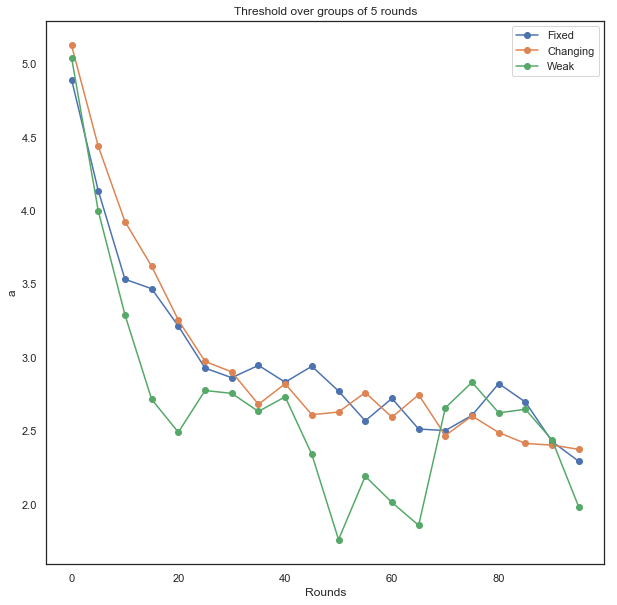

In [571]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")


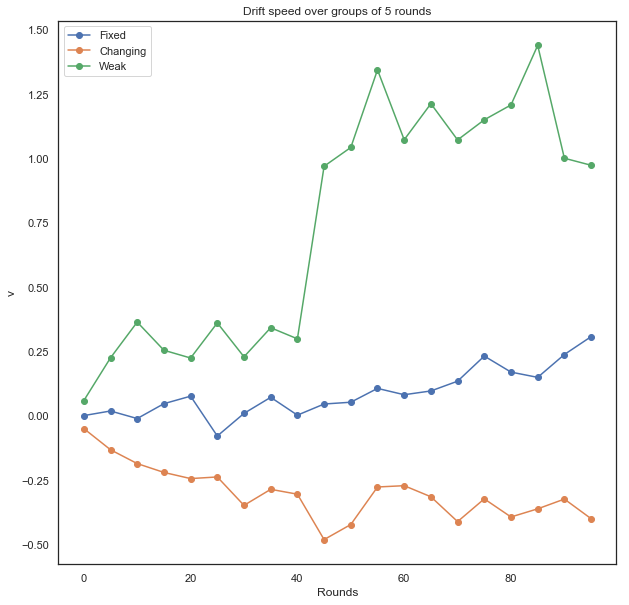

In [139]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

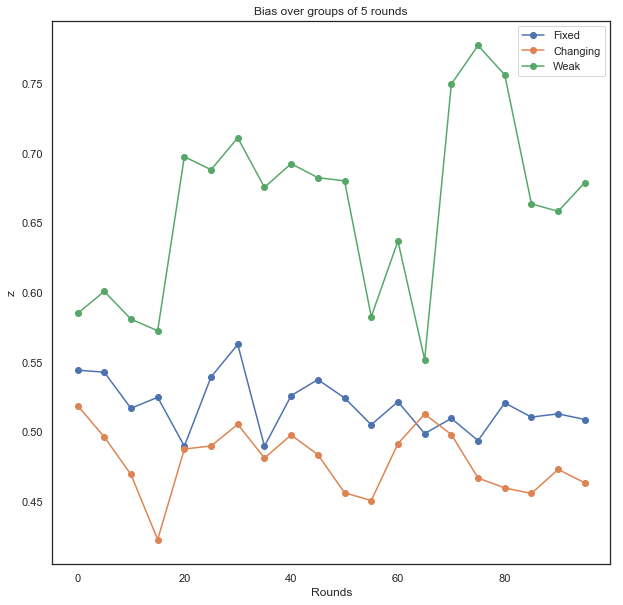

In [140]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

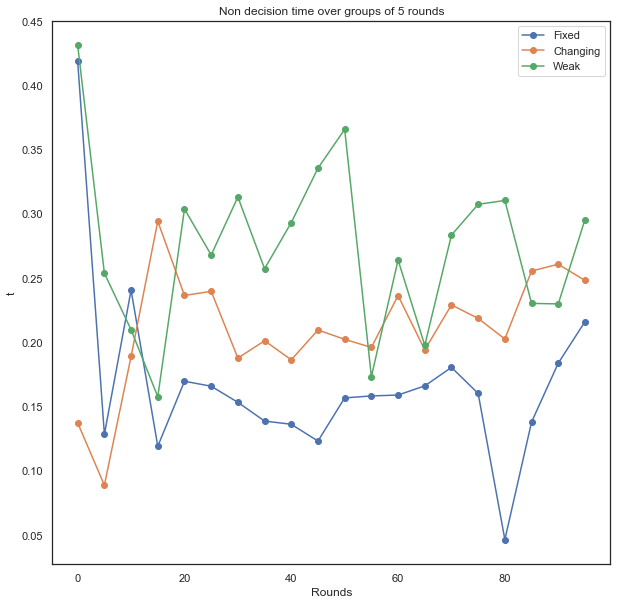

In [141]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

In [573]:
dataDTA = pd.io.stata.read_stata('PD in Mixed Strategies.dta')
dataDTA

,subject,group,profit,totalprofit,participate,treatment,session,belief,cooperation,female,knownsubjects,knownexperiment,gametheory,timeinstructions,timebelief,timedecision,timequestionnaire
0,1,1,6.85,6.85,1,1,1,30.0,0,1,0,0,1,99.404,34.773,52.089,32.760
1,2,1,6.00,6.00,1,1,1,90.0,100,1,0,0,0,78.905,43.259,5.241,11.170
2,3,1,6.85,6.85,1,1,1,50.0,0,1,0,0,0,48.360,20.093,40.264,17.753
3,4,1,5.50,5.50,1,1,1,70.0,100,1,2,0,0,110.776,18.034,7.722,14.461
4,5,1,6.30,6.30,1,1,1,80.0,0,1,1,0,0,124.676,34.523,24.212,12.339
5,6,1,6.85,6.85,1,1,1,50.0,0,0,0,0,1,222.208,71.917,62.432,31.029
6,7,1,5.50,5.50,1,1,1,70.0,100,0,1,0,1,68.344,21.934,22.370,14.227
7,8,1,6.85,6.85,1,1,1,60.0,0,0,1,0,0,89.935,44.085,2.995,17.051
8,9,1,6.30,6.30,1,1,1,50.0,0,1,0,0,0,74.849,37.050,22.698,15.631
9,10,1,5.00,5.00,1,1,1,80.0,100,0,0,0,0,173.176,55.037,173.146,16.303


## Ten by ten rounds

In [27]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Ten by Ten rounds
st=time.time()
rounds = range(0,10)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 10, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 10)) &  (fixed_s["round"] <= ((r+1) * 10))], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r * 10, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 10) &  (changing_s["round"] <= (r+1) * 10)], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r * 10, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 10) &  (weak_s["round"] <= (r+1) * 10)], 2000, 20)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 10
    df_c["round"] = r * 10
    df_w["round"] = r * 10
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*10) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds10.csv")
        c_rounds.to_csv("changing_rounds10.csv")
        w_rounds.to_csv("weak_rounds10.csv")

Model: Fixed, round 0, time: 0.000559
 [-----------------100%-----------------] 2000 of 2000 complete in 6.4 secModel: changing, round 0, time: 6.458153
 [-----------------100%-----------------] 2000 of 2000 complete in 9.1 secModel: weak, round 0, time: 15.674978
 [-----------------100%-----------------] 2000 of 2000 complete in 3.5 secRounds: 0
Model: Fixed, round 10, time: 19.401936
 [-----------------100%-----------------] 2000 of 2000 complete in 6.1 secModel: changing, round 10, time: 25.583941
 [-----------------100%-----------------] 2000 of 2000 complete in 8.9 secModel: weak, round 10, time: 34.531876
 [-----------------100%-----------------] 2000 of 2000 complete in 2.8 secRounds: 1
Model: Fixed, round 20, time: 37.577791
 [-----------------100%-----------------] 2000 of 2000 complete in 5.8 secModel: changing, round 20, time: 43.479445
 [-----------------100%-----------------] 2000 of 2000 complete in 8.1 secModel: weak, round 20, time: 51.624207
 [-----------------100%----

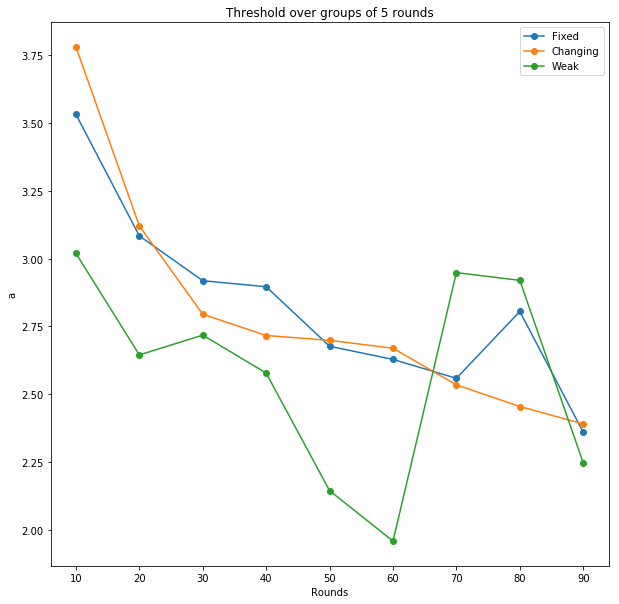

In [28]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")

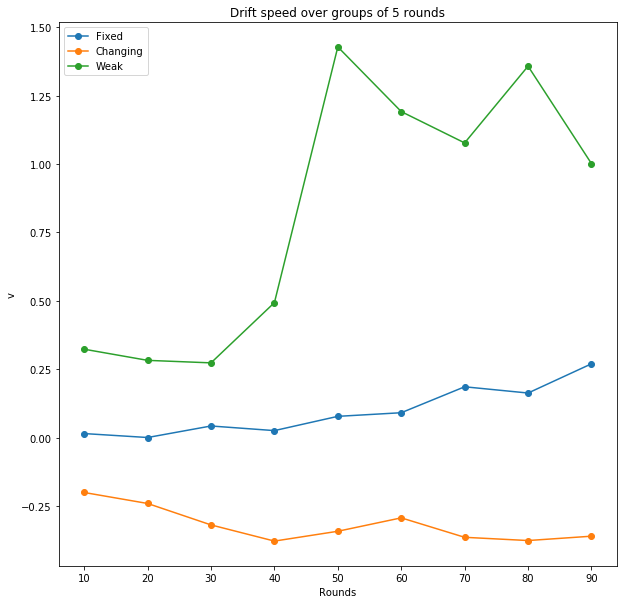

In [29]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

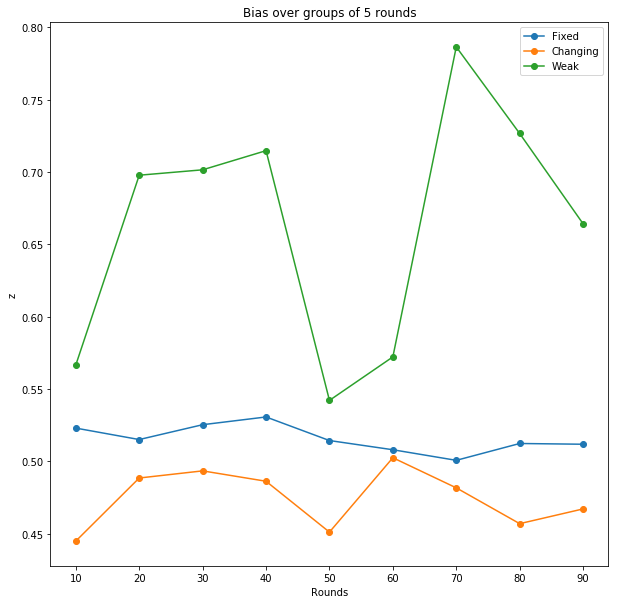

In [30]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

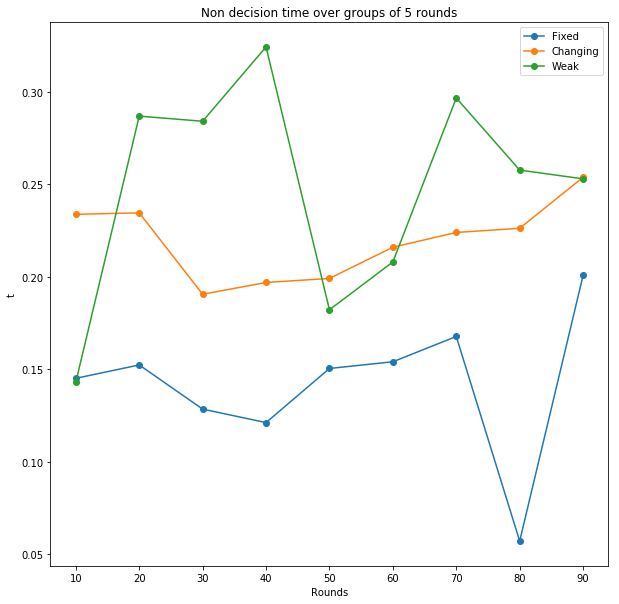

In [31]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

Text(0.5,1,'Threshold and Response time for Fixed PD')

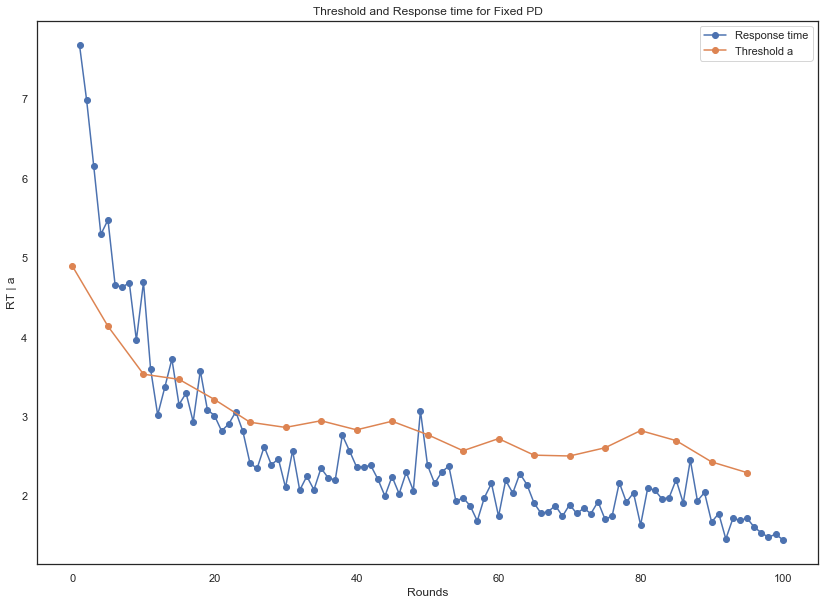

In [168]:
#Reponse time vs threshold
plt.figure(figsize = (14,10))
f_thres = f_rounds.loc[f_rounds.parameter == "a", ["round", "mean"]]

plt.plot(fixed_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(f_thres["round"], f_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Fixed PD")


Text(0.5,1,'Threshold and Response time for Changing PD')

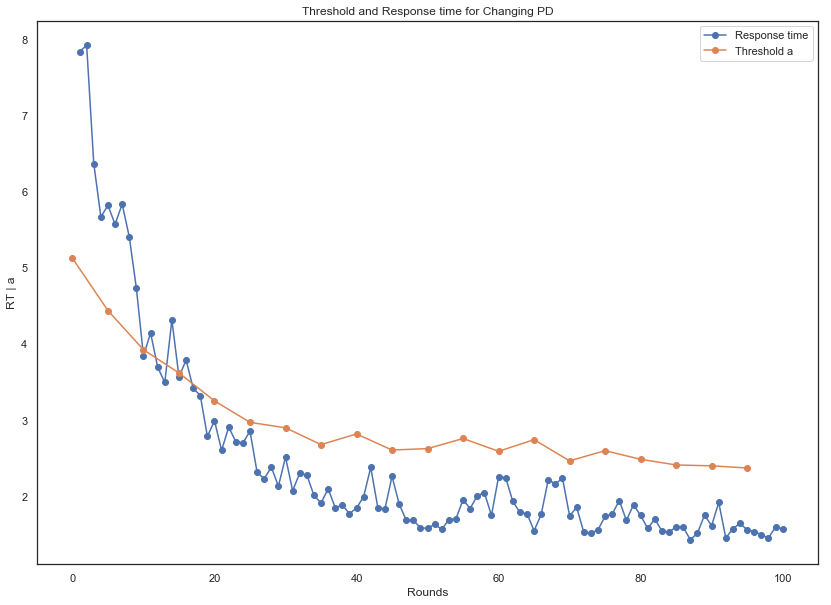

In [169]:
#Changing 
plt.figure(figsize = (14,10))
c_thres = c_rounds.loc[c_rounds.parameter == "a", ["round", "mean"]]

plt.plot(changing_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(c_thres["round"], c_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Changing PD")


Text(0.5,1,'Threshold and Response time for Weak PD')

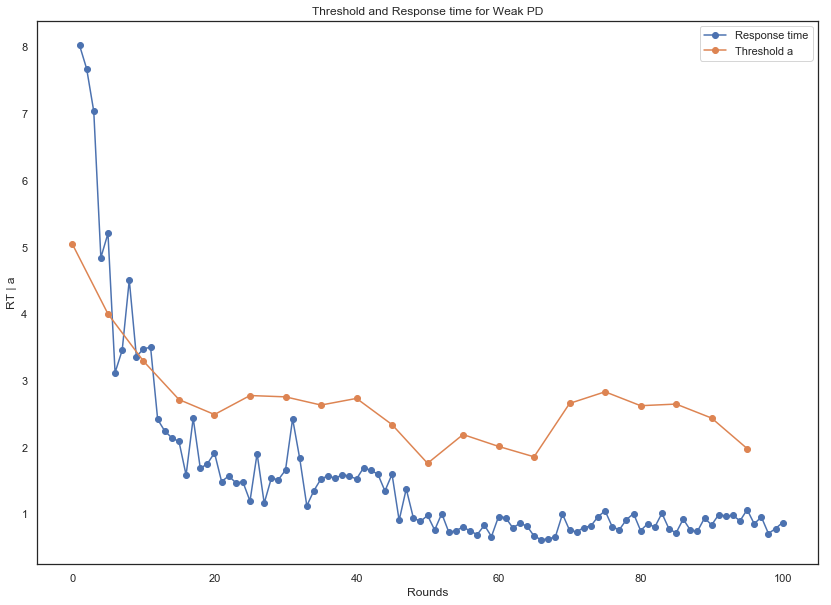

In [170]:
#Weak
plt.figure(figsize = (14,10))
w_thres = w_rounds.loc[w_rounds.parameter == "a", ["round", "mean"]]

plt.plot(weak_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(w_thres["round"], w_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Weak PD")

In [567]:
a_values = []
for i in range(10):
    #np.random.seed(1234)
    #random.seed(1234)
    model = hddm.HDDM(fixed_s, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


 [-----------------100%-----------------] 1000 of 1000 complete in 23.5 sec

In [569]:
a_values

[3.104405370947784,
 3.106843042160764,
 3.105530996215197,
 3.105482383194854,
 3.106316092326098,
 3.105320323619548,
 3.1057781490983185,
 3.105691724730771,
 3.104982325550226,
 3.104894877235769]

Text(0.5,1,'Cooperation rate and Bias over rounds for Fixed PD')

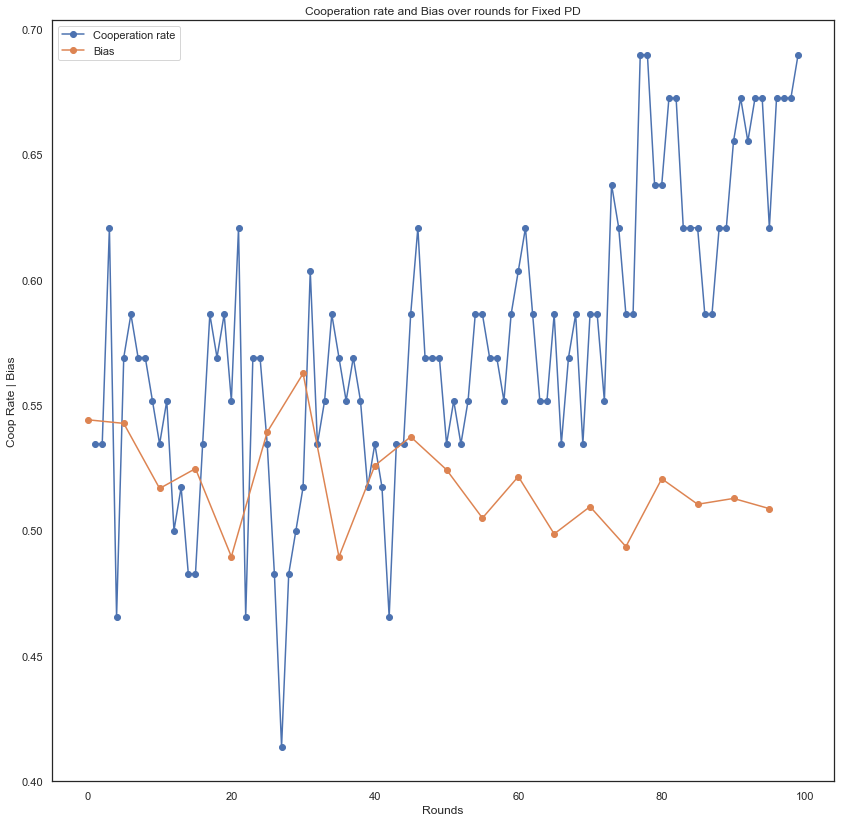

In [212]:
cr = []
for i in range(1, 100):
    f_i = fixed_s.loc[fixed_s["round"] == i]
    cr.append(len(f_i.loc[f_i['response']==1])/float(len(f_i)))

z_fix = f_rounds.loc[f_rounds.parameter == "z", ["round", "mean"]]
plt.figure(figsize = (14,14))
plt.plot(range(1, 100), cr, "-o", label = "Cooperation rate")
plt.plot(z_fix["round"], z_fix["mean"], "-o", label = "Bias")
plt.legend(loc = "best")
plt.ylabel("Coop Rate | Bias")
plt.xlabel("Rounds")
plt.title("Cooperation rate and Bias over rounds for Fixed PD")


# Subjects analysis

In [25]:
import seaborn as sns
sns.set(style="white")
import numpy as np
from scipy import stats

In [5]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data_s = dataLoader.parse_files(files)
data_s = dataLoader.formatData(data_s, subjects=True)

fixed_sj = data_s[data_s.treatment == "fix"]
changing_sj = data_s[data_s.treatment == "changing"]
weak_sj = data_s[data_s.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds_s = pd.DataFrame()
c_rounds_s = pd.DataFrame()
w_rounds_s = pd.DataFrame()

In [26]:
def plot_params(stats_df, title):
    parameters = ["a", "v", "z", "t"]
    fig, axs = plt.subplots(4, 4)
    fig.set_size_inches(13,13) 
    fig.suptitle('Correlation plots with Pearson coefficient, %s, (subjects model)' % (title), fontsize=16)
    i = 0
    j = 0
    for p2 in parameters:
        j = 0
        for p in parameters:
            x = stats_df.loc[stats_df.param == p, "mean"]
            y = stats_df.loc[stats_df.param == p2, "mean"]
            axs[i,j].scatter(x, y)
            axs[i,j].set_title("Corr: %f, p value: %s" % (np.round(stats.pearsonr(x,y)[0], 2), np.round(stats.pearsonr(x,y)[1], 4)))
            j = j + 1
        i = i + 1

    axs.flat[0].set(ylabel='a')
    axs.flat[4].set(ylabel='v')
    axs.flat[8].set(ylabel='z')
    axs.flat[12].set(ylabel='t')

    axs.flat[12].set(xlabel='a')
    axs.flat[13].set(xlabel='v')
    axs.flat[14].set(xlabel='z')
    axs.flat[15].set(xlabel='t')

In [76]:
def pearson(x, y, **kws):
    ax = plt.gca()
    r, p = stats.pearsonr(x, y)
    ax.annotate("r = %f, p = %f" % (r,p),
                xy=(.1, .9), xycoords=ax.transAxes)

def spearman(x, y, **kws):
    ax = plt.gca()
    s, p = stats.spearmanr(x, y)
    ax.annotate("s = %f, p = %f" % (s,p),
                xy=(.1, .9), xycoords=ax.transAxes)
    
    

In [78]:
def grid_plot(stats_df):
    z = list(stats_df.loc[stats_df.param == "z", "mean"])
    a = list(stats_df.loc[stats_df.param == "a", "mean"])
    t = list(stats_df.loc[stats_df.param == "t", "mean"])
    v = list(stats_df.loc[stats_df.param == "v", "mean"])

    dict = {"a": a , "v": v, "z":z, "t": t}

    samp = pd.DataFrame(dict)
    g = sns.PairGrid(samp, palette=["red"])
    g.map_upper(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_lower(corrfunc)
    g.map_upper(spearman)

In [83]:

f_all = modeler.fit_model(fixed_sj, 1000, 400)


 [-----------------100%-----------------] 1000 of 1000 complete in 84.5 sec

In [84]:
stats_df = modeler.get_stats(f_all, True)

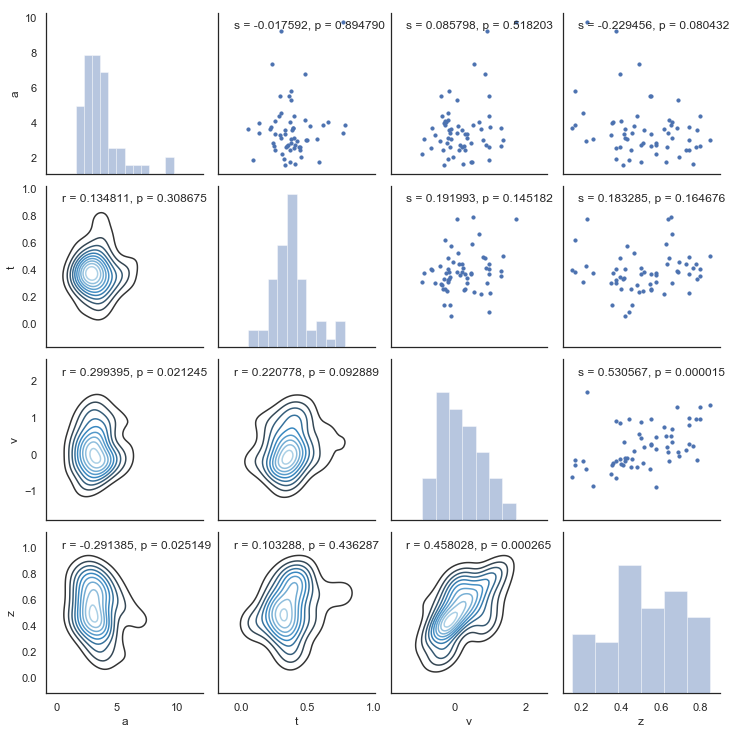

In [85]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(pearson)
g.map_upper(spearman)


 [-----------------100%-----------------] 1000 of 1000 complete in 117.0 sec

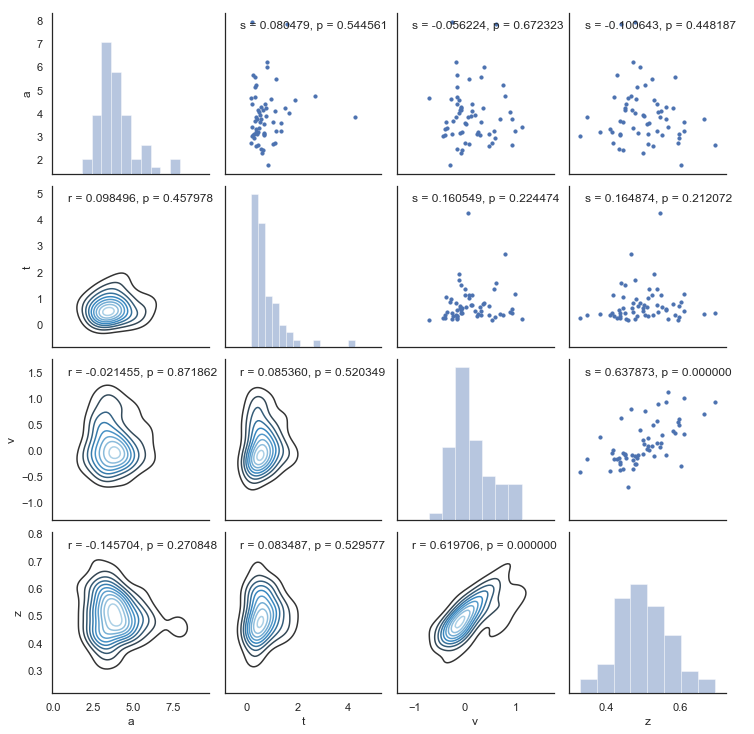

In [79]:
#0-25
f_25 = modeler.fit_model(fixed_sj[fixed_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(f_25, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 88.6 sec

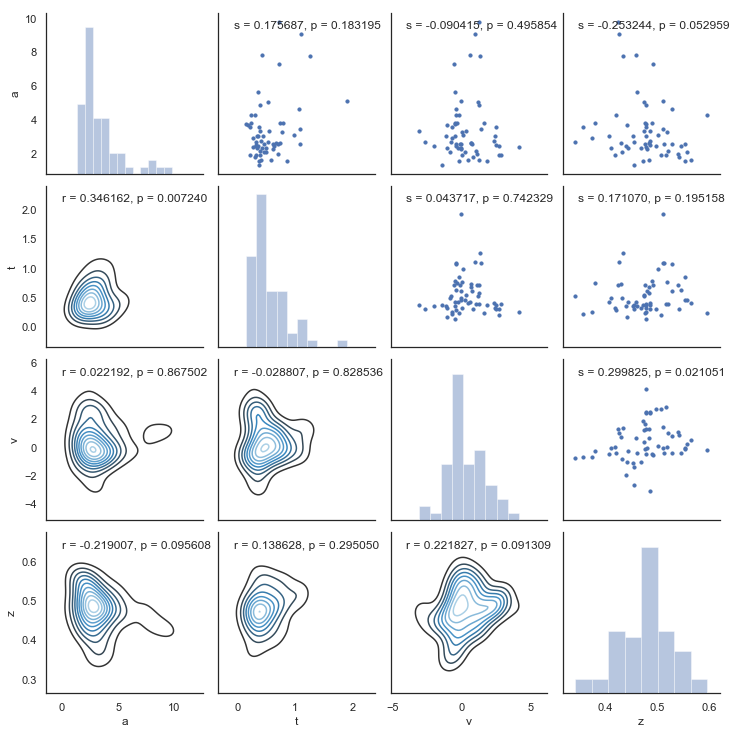

In [80]:
#25-50
rang = range(26,50)
f_26_50 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_26_50, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 76.6 sec

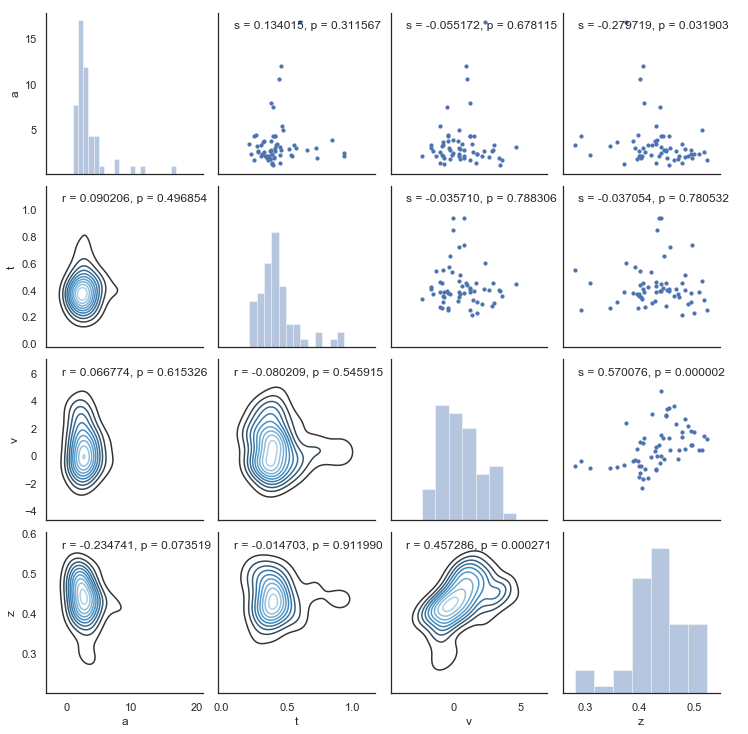

In [81]:
#51-75
rang = range(51,75)
f_51_75 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_51_75, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 75.3 sec

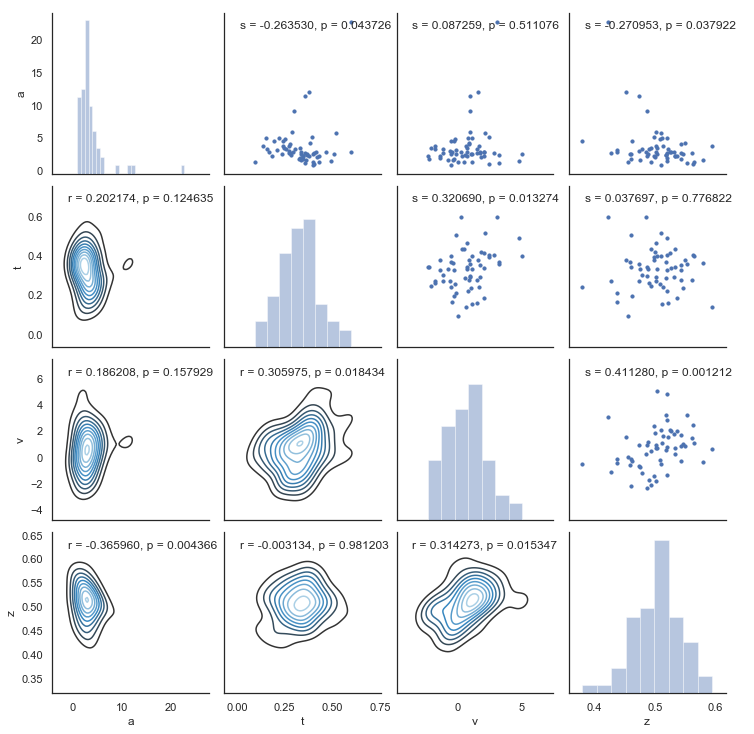

In [82]:
#76-100
rang = range(76,100)
f_76_100 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_76_100, True)
grid_plot(stats_df)

In [ ]:
##Changing

In [86]:

c_all = modeler.fit_model(changing_sj, 1000, 400)


 [-----------------100%-----------------] 1001 of 1000 complete in 148.5 sec

In [87]:
stats_df = modeler.get_stats(c_all, True)

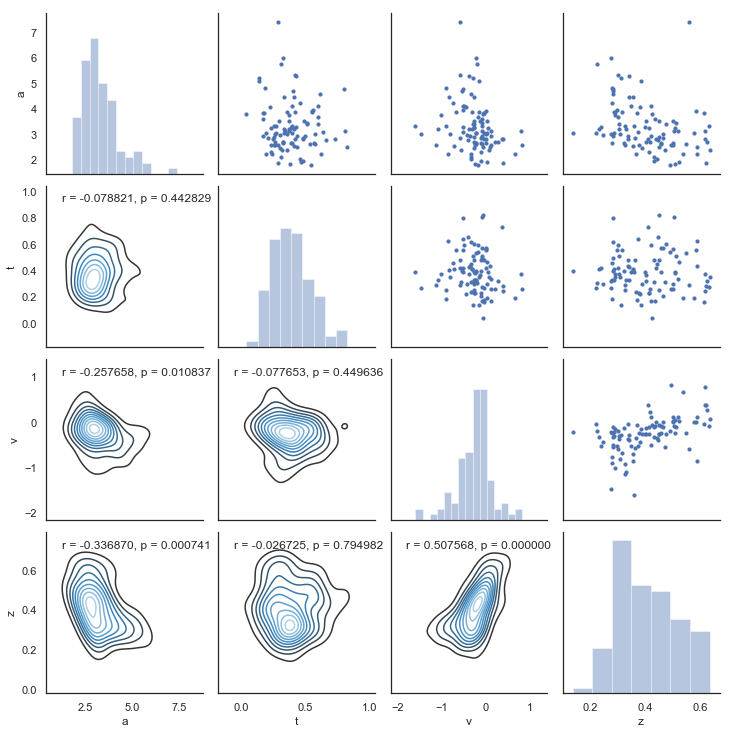

In [88]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


 [-----------------100%-----------------] 1000 of 1000 complete in 206.6 sec

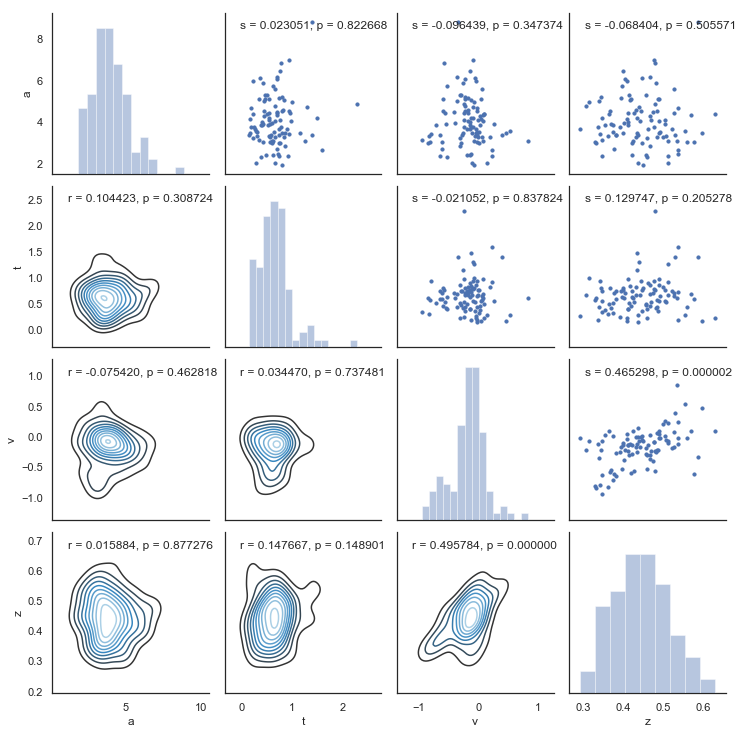

In [89]:
#0-25
c_25 = modeler.fit_model(changing_sj[changing_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(c_25, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 130.6 sec

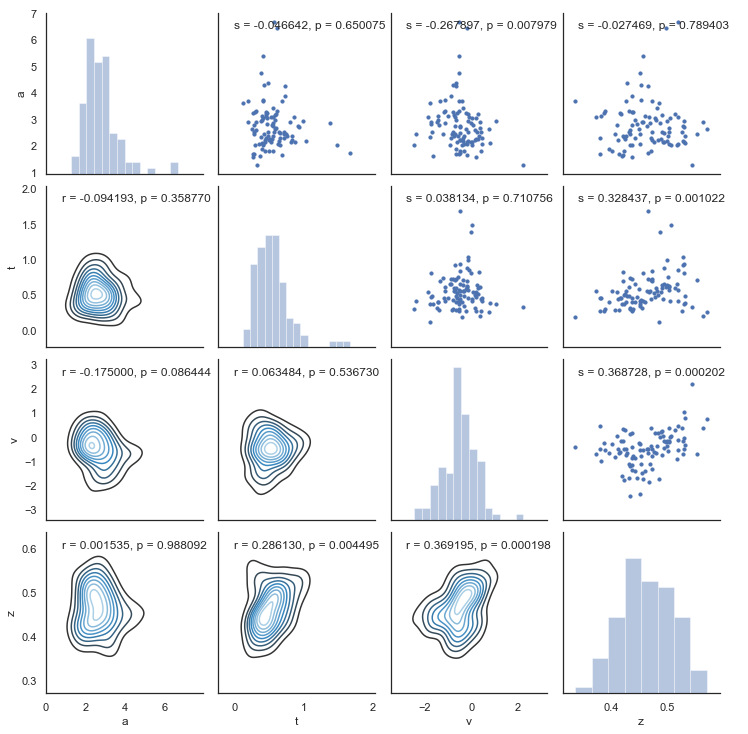

In [90]:
#25-50
rang = range(26,50)
c_26_50 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_26_50, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1001 of 1000 complete in 121.6 sec

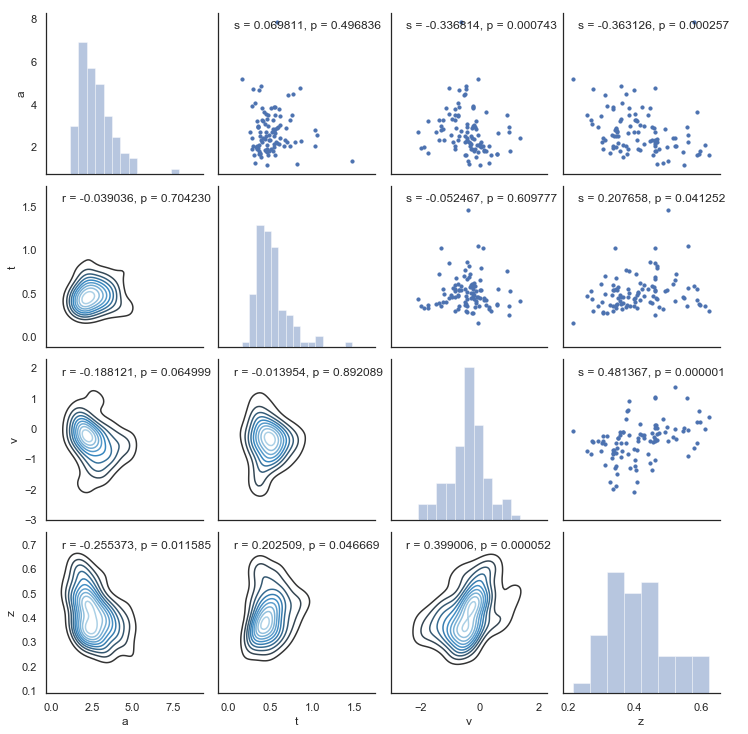

In [91]:
#51-75
rang = range(51,75)
c_51_75 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 118.2 sec

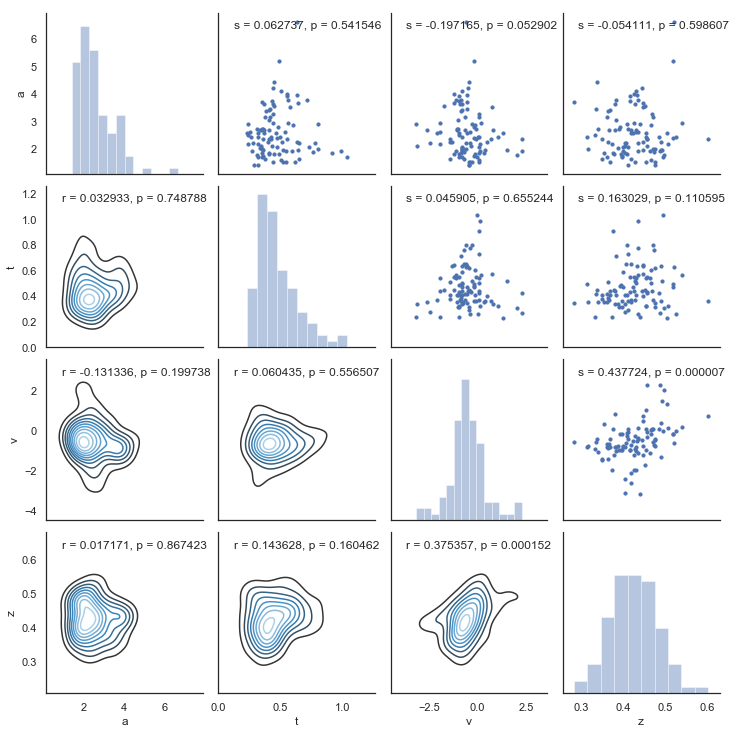

In [92]:
#76-100
rang = range(76,100)
c_76_100 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_76_100, True)
grid_plot(stats_df)

In [93]:
##Weak

In [94]:

w_all = modeler.fit_model(weak_sj, 1000, 400)


 [-----------------100%-----------------] 1000 of 1000 complete in 22.2 sec

In [95]:
stats_df = modeler.get_stats(w_all, True)

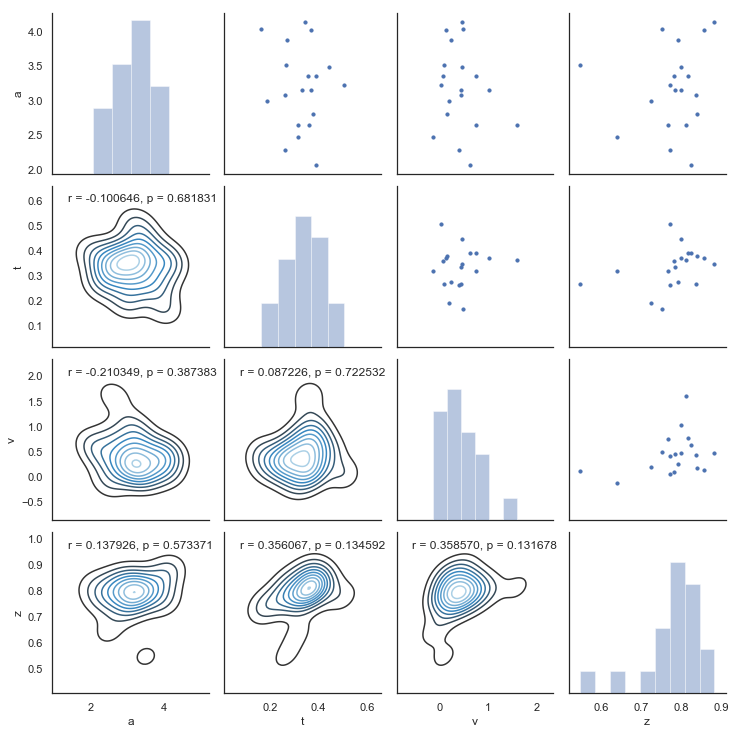

In [96]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


 [-----------------100%-----------------] 1000 of 1000 complete in 30.4 sec

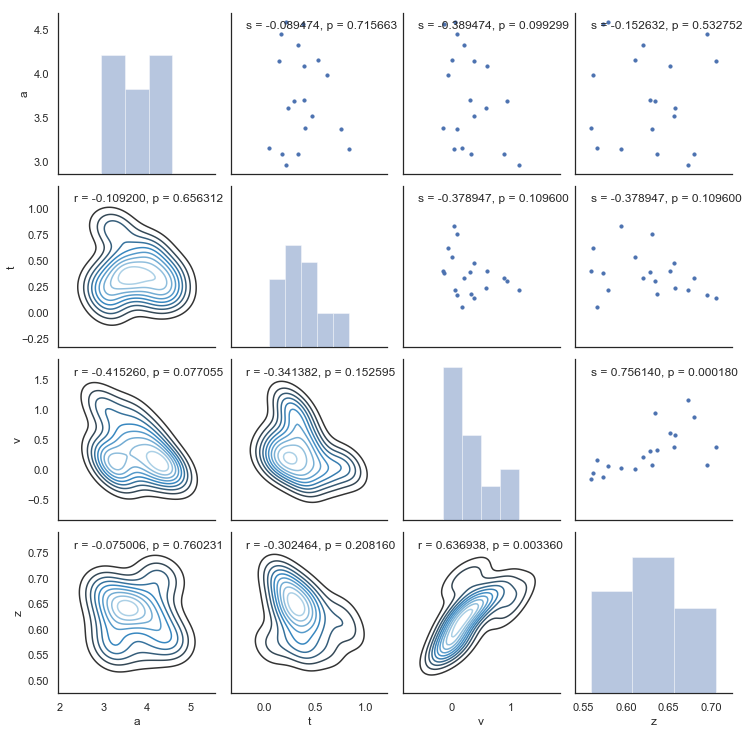

In [97]:
#0-25
w_25 = modeler.fit_model(weak_sj[weak_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(w_25, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 21.4 sec

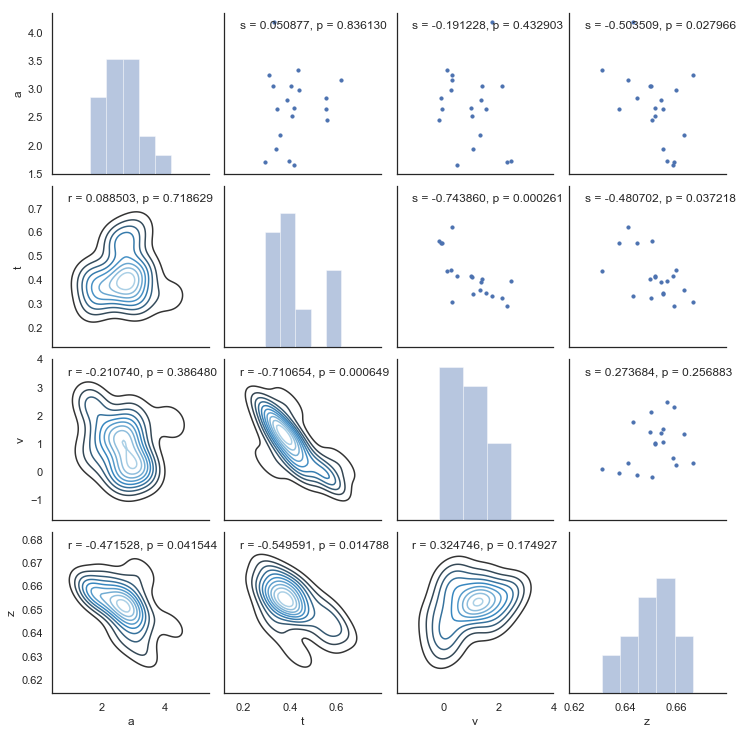

In [98]:
#25-50
rang = range(26,50)
w_26_50 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_26_50, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 19.0 sec

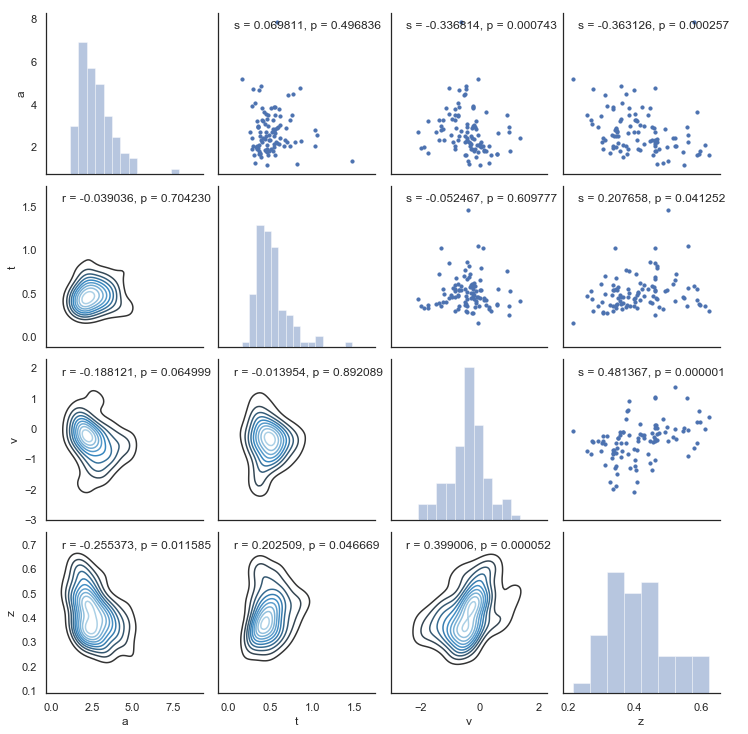

In [99]:
#51-75
rang = range(51,75)
w_51_75 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

 [-----------------100%-----------------] 1000 of 1000 complete in 18.3 sec

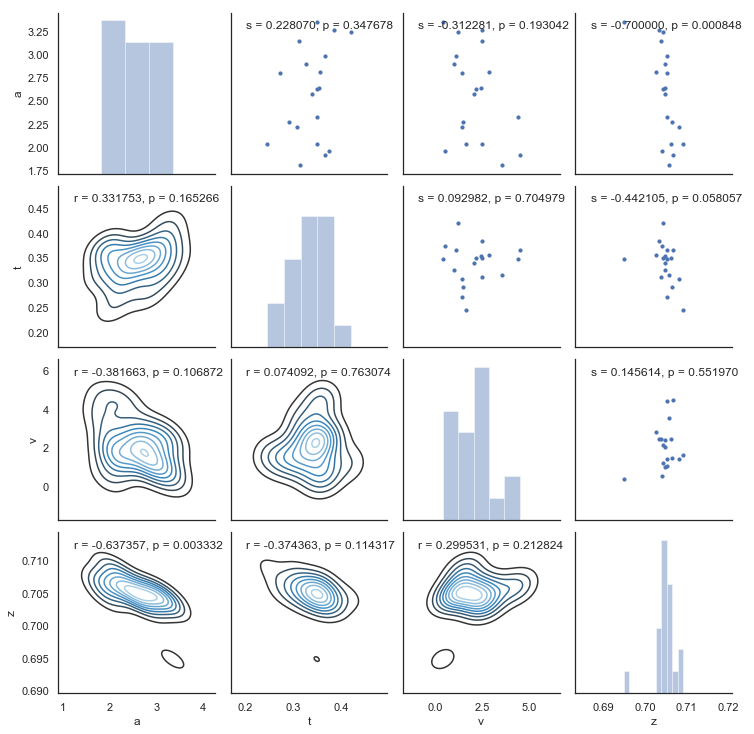

In [100]:
#76-100
rang = range(76,100)
w_76_100 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_76_100, True)
grid_plot(stats_df)

## Simulating data to test package

In [173]:
D = 1 #Difusion constant
z =10 # Initial condition (bias)
v = .1 #Drift
alpha = 12 # upper barrier value
N = 10000
t_mc = [0] * N 
dt = 0.01

In [182]:
for i in range(1, N):
   x = z
   n = 0
   while x > 0:
      x = x - v * dt + D ** .5 * np.random.normal() * dt**0.5
      n = n + 1
      if x > alpha:
         x = z
         n = 0
   t_mc[i] = n * dt

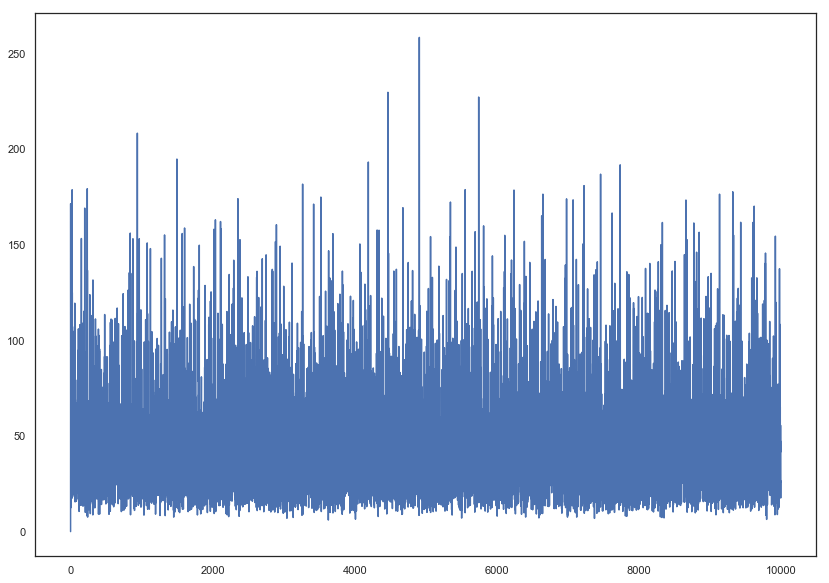

In [186]:
plt.figure(figsize = (14,10))
plt.plot(t_mc)

In [581]:
## Second method

#Simulate random walk with a drift. 
#You start from z and in each time step you add a random number from Gaussian distribution
#and constant drift v towards one of the decisions. 
#You continue until you cross one of the barriers a or -a and note that as a decision time with the decision. 
#Then fit this distribution fro which you know exactly z, v and a using the package.
rounds = 1
sim = pd.DataFrame()

for r in range(rounds):
    subjects = 10000
    dec_times = [0] * subjects
    responses = [0] * subjects
    for sub in range(subjects):
        z = 2 # Initial condition (bias)
        v = -0.6  # Drift
        a = 5  # upper barrier value
        N = 100000
        t0 = 0.01  # non decision time
        s = z  # deliberation status
        D = 1 #Difusion constant
        for i in range(N):
            rand = np.random.normal()
            if (s < a) and s > 0:
                s = s - v * t0 + D ** .5 * np.random.randn() * t0**0.5
                #dt = dt + 1
            else:
                if s > 0:
                    responses[sub] = 1
                dec_times[sub] = t0 * i
                break
        if dec_times[sub] == 0.0:
            print ("no decision")
                
    dic = {"player": range(subjects), "rt": dec_times, 'response': responses, "round": [r] * subjects}
    sim_times = pd.DataFrame(dic)
    if r == 0:
        sim = sim_times
    else:
        sim = sim.append(sim_times, ignore_index = True)

In [582]:
sim.loc[sim.response == 1, "rt"].mean()

4.487418584455059

In [583]:
sim.loc[sim.response == 0, "rt"].mean()

3.3894543147208127

In [584]:
sim.to_csv("sim_times.csv")

In [585]:
#Load to HDDM

sim = hddm.load_csv("sim_times.csv")
sim = data = hddm.utils.flip_errors(sim)
sim

,Unnamed: 0,player,response,round,rt
0,0,0,1,0,1.81
1,1,1,1,0,3.78
2,2,2,1,0,2.04
3,3,3,1,0,2.09
4,4,4,1,0,11.46
5,5,5,1,0,2.01
6,6,6,1,0,2.15
7,7,7,1,0,3.27
8,8,8,1,0,2.59
9,9,9,0,0,-1.26


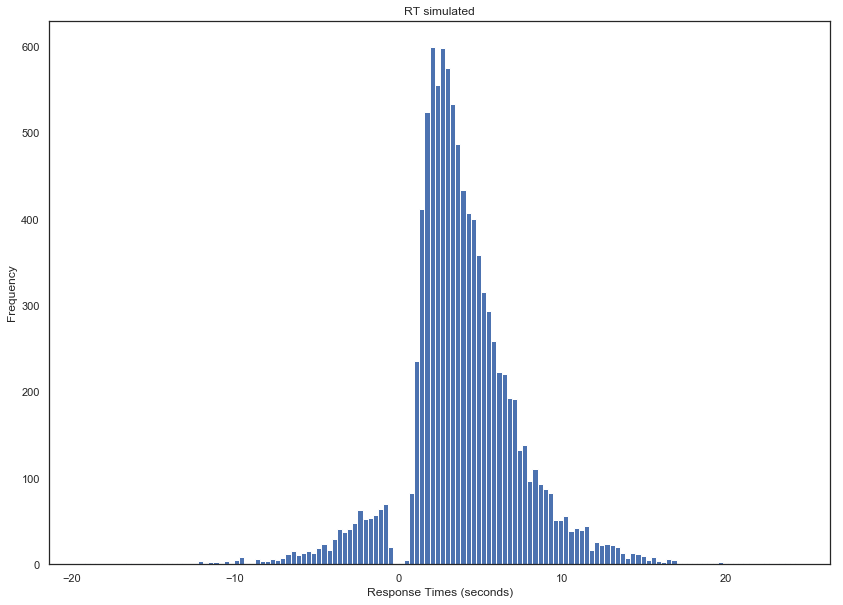

In [586]:
plt.figure(figsize = (14,10))
plt.hist(sim.rt, bins = "auto")
plt.xlabel("Response Times (seconds)")
plt.ylabel("Frequency")
plt.title("RT simulated")
plt.show()

In [561]:
a_values = []
for i in range(10):
    np.random.seed(1234)
    random.seed(1234)
    model = hddm.HDDM(sim, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


 [-----------------100%-----------------] 1000 of 1000 complete in 38.7 sec

In [564]:
np.mean(a_values)

11.155995130284381

In [587]:
model = hddm.HDDM(sim, bias = True)
model.sample(10000, burn = 100)
model.gen_stats()

 [-------          20%                  ] 2064 of 10000 complete in 87.9 secHalting at iteration  2066  of  10000


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,5.10477,0.0293128,5.04585,5.0845,5.10559,5.12492,5.15877,0.000914724
v,0.600808,0.0069454,0.586811,0.596245,0.600905,0.605365,0.614514,0.000250089
t,0.0397678,0.0131107,0.015332,0.0306162,0.0394959,0.0485892,0.066556,0.000401844
z,0.407852,0.0039203,0.399817,0.40523,0.407874,0.410606,0.415208,0.000148166
